# Aprendizado Profundo ou Deep Learning 

## O que √©:
Deep learning √© uma sub√°rea da intelig√™ncia artificial (IA) e do machine learning (aprendizado de m√°quina) que se concentra no uso de redes neurais artificiais profundas para resolver problemas complexos.

## Como funciona:
O deep learning utiliza redes neurais profundas para processar os dados. Essas redes consistem em neur√¥nios artificiais organizados em camadas interconectadas.

Cada camada recebe informa√ß√µes da anterior, transforma-as de acordo com par√¢metros aprendidos durante o treinamento e passa os resultados adiante.

O treinamento de uma rede neural √© feito usando algoritmos de aprendizado, como o backpropagation (retropropaga√ß√£o), que ajusta os pesos das conex√µes entre os neur√¥nios para minimizar os erros entre as previs√µes do modelo e os resultados reais. 

## Diferen√ßa entre machine learning e deep learning:
‚Üí Machine learning convencional geralmente depende da extra√ß√£o manual de recursos (informa√ß√µes sobre o problema). 

‚Üí Deep learning elimina a necessidade de extrair manualmente caracter√≠sticas dos dados.

## Diferen√ßa entre deep learning e redes neurais:
‚Üí Redes neurais s√£o o conceito fundamental, representando um modelo matem√°tico inspirado no 
funcionamento do c√©rebro humano.

‚Üí Deep learning √© uma aplica√ß√£o espec√≠fica das redes neurais, que utiliza muitas camadas para realizar aprendizado profundo.

‚ö†Ô∏è toda t√©cnica de deep learning utiliza redes neurais, mas nem toda rede neural √© usada em deep learning.

## Tipos de algoritmos de deep learning:
* Redes neurais convolucionais (CNN) ‚Üí p/ imagens (reconhecimento facial, detec√ß√£o de objetos e an√°lise de imagens m√©dicas)
* Redes neurais recorrentes (RNN) ‚Üí p/ palavras (s√©ries temporais, texto ou √°udio)
* Redes advers√°rias generativas (GAN) ‚Üí p/ deepfakes (imagens, v√≠deos, m√∫sicas ou textos)
* Modelos de difus√£o ‚Üí p/ gera√ß√£o (imagens, √°udio e at√© design molecular)
* Modelos transformadores ‚Üí p/ ChatGPT e Google Gemini (sequ√™ncias de dados, como texto, √°udio e s√©ries temporais)

## Por que usar o deep learning?
‚Üí Para analisar dados n√£o estruturados com efici√™ncia: 
* Machine learning √© comum trabalharmos com dados estruturados, tabelas com informa√ß√µes organizadas por colunas.
* Deep learning se destaca por sua habilidade de lidar com dados n√£o estruturados, como imagens, √°udios, textos e v√≠deos, que representam a maior parte das informa√ß√µes dispon√≠veis no mundo real.

## Refer√™ncias:
* https://www.alura.com.br/artigos/deep-learning?srsltid=AfmBOooSLdvjpGMPscvEjYUV2DSGTaYsRP7lAXVjKxTWwcF0tL8dnmP1
* https://didatica.tech/introducao-a-redes-neurais-e-deep-learning/#:~:text=Deep%20Learning%20x%20Redes%20Neurais&text=Conforme%20j%C3%A1%20mencionamos%2C%20o%20deep,n%C3%A3o%20estamos%20utilizando%20deep%20learning.






### Importar Bibliotecas

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

ModuleNotFoundError: No module named 'matplotlib'

### Obter os dados e j√° dividi-los em treinamento e teste automaticamente


In [ ]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data() 


### Exibir um item da base de dados

Text(0.5, 1.0, '0')

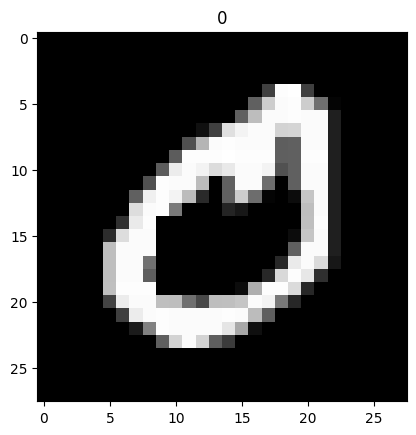

In [ ]:
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

### Mudar dimens√£o para 784 (original est√° em 28x28)
Seguir as etapas de transforma√ß√£o de ‚Üë‚Üí para ‚Üí, que s√£o comuns no pr√©-processamento de dados para tarefas de aprendizado profundo, especialmente quando se trabalha com imagens. 


Na base de dados que est√° armazenada na vari√°vel `X_treinamento`

Passo 1: Entender a distribui√ß√£o dos dados

In [ ]:
print("Forma: ", X_treinamento.shape)
print("Qtd linhas: ", len(X_treinamento))
print("Qtd colunas: ", X_treinamento.shape[1:])

Forma:  (60000, 28, 28)
Qtd linhas:  60000
Qtd colunas:  (28, 28)


Passo 2: Redimensionamento dos dados (reshape):

**Por que fazer isso?**

Em muitos modelos de aprendizado profundo, especialmente redes neurais densas (totalmente conectadas), a entrada precisa ser um vetor unidimensional. Imagens, por outro lado, s√£o dados multidimensionais (largura, altura e canais de cor).

O reshape transforma cada imagem em um longo vetor, "achatando" a matriz multidimensional em um vetor unidimensional. Isso torna os dados compat√≠veis com a camada de entrada da rede neural.

np.prod(X_treinamento.shape[1:]) calcula o n√∫mero total de elementos em todas as dimens√µes, exceto a primeira (que geralmente representa o n√∫mero de amostras). 

Isso garante que o vetor resultante tenha o tamanho correto.Transformar de uma imagem quadrada ‚Üë‚Üí para uma imagem linha ‚Üí

In [ ]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
#X_treinamento.shape[1:] ‚Üí Pega todas as dimens√µes depois da primeira. No caso (60000, 28, 28), isso retorna (28, 28).
#np.prod((28, 28)) ‚Üí Multiplica 28 √ó 28 = 784. Isso significa que cada imagem de 28√ó28 ser√° achatada em um vetor de 784 elementos.
#reshape ‚Üí Isso transforma cada imagem 28√ó28 em um vetor unidimensional de 784 valores (achatando os dados), mantendo o mesmo n√∫mero de amostras (60000).

#Observa√ß√£o: Se estiv√©ssemos lidando com imagens coloridas (RGB 28√ó28√ó3), o c√≥digo adaptaria automaticamente para 28√ó28√ó3 = 2352 entradas.

X_treinamento[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Passo 3: Convers√£o para float32 (para possibilitar a normaliza√ß√£o [de 0 a 1] dos dados)

**Por que fazer isso?**

A normaliza√ß√£o [de 0 a 1], que vem na pr√≥xima etapa, envolve dividir os valores dos pixels por 255. 

Essa divis√£o requer que os dados sejam do tipo float (n√∫mero de ponto flutuante) para evitar arredondamentos indesejados.

float32 √© um tipo de dado de ponto flutuante de 32 bits, que oferece precis√£o suficiente para a maioria das aplica√ß√µes de aprendizado profundo.

In [ ]:
X_treinamento = X_treinamento.astype('float32')
X_treinamento[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Passo 4: Normalizar os dados (255 √© o valor m√°ximo de um pixel)

**Por que fazer isso?**

A normaliza√ß√£o √© uma t√©cnica crucial para melhorar o desempenho e a estabilidade do treinamento de redes neurais.

Dividir os valores dos pixels por 255 escala os dados para o intervalo de 0 a 1. 

Isso garante que todos os recursos (pixels) tenham uma escala semelhante, o que facilita o aprendizado da rede.

A normaliza√ß√£o ajuda a evitar que grandes valores de entrada dominem o processo de treinamento e pode acelerar a converg√™ncia do modelo.

In [ ]:
X_treinamento /= 255  #Divide por 255 para normalizar os valores entre 0 e 1
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Passo 5: Transformar as 10 classes de sa√≠da da vari√°vel `y_treinamento` para dummies variables (one-hot encoding):


**Por que fazer isso?**

Em tarefas de classifica√ß√£o multiclasse, como a classifica√ß√£o de d√≠gitos (onde voc√™ tem 10 classes ), a vari√°vel de destino (r√≥tulos) precisa ser representada de forma adequada para a rede neural.

to_categorical realiza o one-hot encoding, que transforma cada r√≥tulo em um vetor bin√°rio. Por exemplo, o r√≥tulo "3" seria transformado em um vetor com 10 elementos, onde o quarto elemento √© 1 e os demais s√£o 0.

* [0, 1, 2, **3**, 4, 5, 6, 7, 8 e 9]
* [0, 0, 0, **1**, 0, 0, 0, 0, 0 e 0]

Essa representa√ß√£o permite que a rede neural produza probabilidades para cada classe e facilita o c√°lculo da fun√ß√£o de perda durante o treinamento.

In [ ]:
y_treinamento = to_categorical(y_treinamento, 10)
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Fazer o mesmo na base de dados que est√° armazenada na vari√°vel `X_teste`

Passo 1: Entender a distribui√ß√£o dos dados

In [ ]:
print("Forma: ", X_teste.shape)
print("Qtd linhas: ", len(X_teste))
print("Qtd colunas: ", X_teste.shape[1:])

Forma:  (10000, 28, 28)
Qtd linhas:  10000
Qtd colunas:  (28, 28)


Passo 2:  Redimensionamento dos dados (reshape)

In [ ]:
#Faz a mesma coisa com a base acima, por√©m com a parti√ß√£o de teste
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Passo 3: Convers√£o para float32



In [ ]:
X_teste = X_teste.astype('float32')
X_teste[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Passo 4: Normaliza√ß√£o dos dados

In [ ]:
X_teste /= 255  #Divide por 255 para normalizar os valores entre 0 e 1
X_teste[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Passo 5: Transforma√ß√£o das classes em dummies variables (one-hot encoding)

In [ ]:
y_teste = to_categorical(y_teste, 10)
y_teste[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Criar a estrutura da rede neural:
`Entrada (784)` ‚Üí `Camada oculta (64)` ‚Üí `Camada oculta (64)` ‚Üí `Camada oculta (64)` ‚Üí `Sa√≠da (10)`


* 3 camadas ocultas com 64 neur√¥nios cada e ativa√ß√£o ReLU.
* Dropout (20%) √© utilizado para zerar o um percentual de neur√¥nios ap√≥s cada camada oculta para evitar overfitting.
* Camada de sa√≠da com 10 neur√¥nios e ativa√ß√£o Softmax, ideal para classifica√ß√£o multiclasse.

In [ ]:
# Armazena na vari√°vel o modelo Sequencial (feedforward), onde as camadas s√£o adicionadas uma ap√≥s a outra (em sequ√™ncia)
modelo = Sequential() 

modelo.add(Dense(units = 64, # Adiciona uma camada densa totalmente conectada com 64 neur√¥nios
                 activation = 'relu', # ReLU (Rectified Linear Unit ùëì(ùë•)=max‚Å°(0,ùë•) melhora o aprendizado e evita satura√ß√£o como o sigmoid (vanishing gradient)
                 input_dim = 784)) # Entrada tem 784 neur√¥nios (√∫til para imagens 28√ó28 achatadas)
modelo.add(Dropout(0.2)) # Zera aleatoriamente 20% dos neur√¥nios durante o treinamento evitando overfitting (for√ßando a rede a n√£o depender excessivamente de neur√¥nios espec√≠ficos)

modelo.add(Dense(units = 64, activation = 'relu')) # Outra camada densa com 64 neur√¥nios e ativa√ß√£o ReLU
modelo.add(Dropout(0.2)) # Dropout aplicado novamente para regularizar a rede

modelo.add(Dense(units = 64, activation = 'relu')) # Igual
modelo.add(Dropout(0.2)) # Igual

modelo.add(Dense(units = 10, activation = 'softmax')) # Camada com 10 neur√¥nios, pois temos 10 classes (d√≠gitos de 0 a 9)
# A fun√ß√£o softmax converte os valores em probabilidades, garantindo que a soma seja 1, permitindo que o modelo escolha a classe (de 0 a 9) com maior probabilidade

C:\Users\Utente\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Resumo da arquitetura da rede neural gerado pelo comando modelo.summary():

In [ ]:
modelo.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 64)             ‚îÇ        50,240 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         4,160 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 10)             ‚îÇ           650 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Explica√ß√£o:

1. **Modelo:** sequential_1
   * Modelos sequenciais s√£o uma pilha linear de camadas, onde cada camada tem exatamente um tensor de **entrada** e um tensor de **sa√≠da**:  
     * `Entrada (784)`** ‚Üí `Densa (64)` ‚Üí `Dropout (0.2)` ‚Üí `Densa (64)` ‚Üí `Dropout (0.2)` ‚Üí `Densa (64)` ‚Üí `Dropout (0.2)` ‚Üí **`Sa√≠da (10)`**

2. **Layer (type)** - Camadas: 
* **Dense:** `dense_4`, `dense_5`, `dense_6`, `dense_7`
  * Essas s√£o camadas densas (ou totalmente conectadas). Em uma camada densa, cada neur√¥nio est√° conectado a todos os neur√¥nios da camada anterior.
  * Cada camada densa realiza uma transforma√ß√£o linear nos dados de entrada, seguida por uma fun√ß√£o de ativa√ß√£o (que n√£o √© mostrada aqui, mas √© crucial).
  * As camadas densas s√£o respons√°veis por aprender padr√µes complexos nos dados.
  * Como os par√¢metros s√£o calculados: Cada camada Densa (Dense) tem dois tipos de par√¢metros trein√°veis
    * Pesos (weights): Cada conex√£o entre os neur√¥nios.
    * Vieses (biases): Um valor adicional para cada neur√¥nio.
  * A f√≥rmula para calcular o n√∫mero total de par√¢metros em uma camada densa √©: 
    * $Par√¢metros=(neur√¥nios¬†da¬†camada¬†anterior * neur√¥nios¬†da¬†camada¬†atual) + neur√¥nios¬†da¬†camada¬†atual$
* **Dropout:** `dropout_3`, `dropout_4`, `dropout_5`
  * O dropout √© uma t√©cnica de regulariza√ß√£o que desativa aleatoriamente uma fra√ß√£o dos neur√¥nios durante o treinamento.
  * Isso ajuda a prevenir o overfitting (quando o modelo se ajusta demais aos dados de treinamento e n√£o generaliza bem para novos dados).

3. **Output Shape** - Formato de Sa√≠da
  * `(None, 64)` significa que a sa√≠da de cada uma das primeiras camadas densas e dropout tem esse formato 
    * `None` representa o tamanho do lote (batch size), que pode variar.
    * `64` indica que cada camada densa tem 64 neur√¥nios.
   * `(None, 10)` na camada de sa√≠da (`dense_7`) tem 10 neur√¥nios, o que sugere que este modelo est√° sendo usado para uma tarefa de classifica√ß√£o com 10 classes.

4. Param # - Par√¢metros
  * **C√°lculo dos valores exibidos:** esses n√∫meros representam a quantidade de par√¢metros (pesos e bias) em cada camada densa
    *  1Ô∏è‚É£ Primeira camada densa (`dense_4`): $(784√ó64)+64=50.240$
    *  2Ô∏è‚É£ Segunda camada densa (`dense_5`): $(64√ó64)+64=4.160$
    *  3Ô∏è‚É£ Terceira camada densa (`dense_6`): $(64√ó64)+64=4.160$
    *  4Ô∏è‚É£ Camada de sa√≠da (`dense_7`): $(64√ó10)+10=650$
    *  ‚úÖ Total de par√¢metros trein√°veis = $59.210$
   * As camadas de dropout n√£o possuem parametros treinaveis, dessa forma o parametro √© $0$.
   * Quanto mais par√¢metros, mais complexo √© o modelo.

### Configurar os par√¢metros da rede neural e trein√°-la utilizando a base de dados de valida√ß√£o

In [ ]:
modelo.compile(optimizer='adam', # Otimizador Adam √© uma varia√ß√£o do gradiente descendente que se adapta √† taxa de aprendizado
               loss='categorical_crossentropy', # Fun√ß√£o de perda para classifica√ß√£o multiclasse
               metrics=['accuracy']) # M√©trica para avaliar o modelo

### Armazenar o hist√≥rico das execu√ß√µes (erro e accuracy)

In [ ]:
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20, validation_data = (X_teste, y_teste)) # Treina o modelo com 20 √©pocas e valida com a parti√ß√£o de teste

# Esquerda  | Direita 

Epoch 1/20
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 4ms/step - accuracy: 0.7569 - loss: 0.7520 - val_accuracy: 0.9515 - val_loss: 0.1647
Epoch 2/20
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9318 - loss: 0.2363 - val_accuracy: 0.9608 - val_loss: 0.1312
Epoch 3/20
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - accuracy: 0.9444 - loss: 0.1899 - val_accuracy: 0.9660 - val_loss: 0.1140
Epoch 4/20
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9524 - loss: 0.1655 - val_accuracy: 0.9669 - val_loss: 0.1158
Epoch 5/20
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9568 - loss: 0.1489 - val_accuracy: 0.9711 - val_loss: 0.1014
Epoch 6/20
1875/1875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 4ms/step - accuracy: 0.9598 - loss: 0.1368 - val_accuracy: 0.970

### Visualizar Accuracy e Loss em um gr√°fico

Interpreta√ß√£o: o erro (embaixo) foi caindo e a acur√°cia foi subindo (em cima)

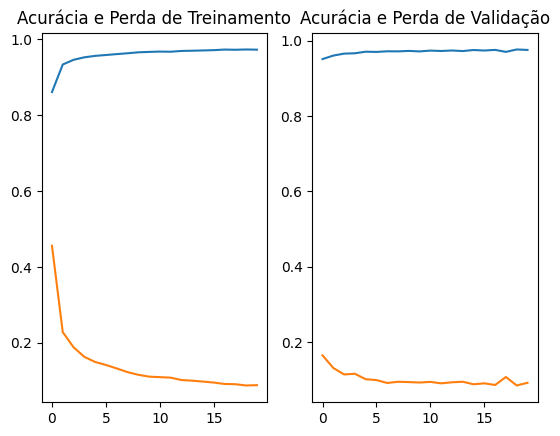

In [ ]:
historico.history.keys() # Mostra as m√©tricas dispon√≠veis

plt.subplot(1, 2, 1) # ‚Üê (linhas, colunas, posi√ß√£o exibida 1)
plt.title('Acur√°cia e Perda de Treinamento') # T√≠tulo do gr√°fico
plt.plot(historico.history['accuracy']) # Acur√°cia de treinamento
plt.plot(historico.history['loss']) # Perda de treinamento 

plt.subplot(1, 2, 2) # ‚Üê (linhas, colunas, posi√ß√£o exibida 2)
plt.title('Acur√°cia e Perda de Valida√ß√£o') # T√≠tulo do gr√°fico
plt.plot(historico.history['val_accuracy']) # Acur√°cia de valida√ß√£o
plt.plot(historico.history['val_loss']) # Perda de valida√ß√£o

### Obter previs√µes:

In [ ]:
previsoes = modelo.predict(X_teste) # Faz previs√µes com a parti√ß√£o de teste para avaliar o modelo 
previsoes

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step


array([[2.2760594e-13, 5.3495668e-08, 3.8849421e-08, ..., 9.9999869e-01,
        5.4592279e-11, 1.0347462e-06],
       [3.1930060e-12, 1.3204173e-05, 9.9997437e-01, ..., 5.9789227e-07,
        2.8791234e-07, 8.9286692e-14],
       [2.3940489e-12, 9.9999142e-01, 4.0788781e-10, ..., 5.2251489e-06,
        2.1417834e-06, 1.6942698e-08],
       ...,
       [3.3294145e-11, 4.7291442e-11, 1.1475713e-09, ..., 7.2616365e-07,
        1.6589013e-08, 1.3259991e-06],
       [3.3194630e-12, 4.9020128e-14, 9.4598461e-13, ..., 1.6817367e-11,
        3.6484284e-08, 3.0573158e-10],
       [5.6296486e-14, 9.2224569e-19, 5.1544337e-16, ..., 1.5560752e-21,
        1.4337551e-13, 1.0109818e-18]], dtype=float32)

In [ ]:
previsoes = (previsoes > 0.5) # Converte as probabilidades em True (1) ou False (0)
previsoes

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### Pegar o n√∫mero de maior valor e gerar a Matriz de Confus√£o

O c√≥digo tem como objetivo avaliar o desempenho de um modelo de classifica√ß√£o que prev√™ d√≠gitos de 0 a 9. Para isso, ele gera uma matriz de confus√£o, que mostra o qu√£o bem o modelo est√° classificando cada d√≠gito.

In [ ]:
y_teste_matriz = [np.argmax(t) for t in y_teste] # Converte as probabilidades em valores de 0 a 9
y_previsoes_matriz = [np.argmax(t) for t in previsoes] # Converte as probabilidades em valores de 0 a 9
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz) # Cria a matriz de confus√£o
confusao

array([[ 972,    1,    1,    0,    0,    1,    2,    1,    2,    0],
       [   3, 1122,    3,    1,    0,    0,    2,    1,    3,    0],
       [   6,    2,  996,    8,    3,    0,    1,    7,    9,    0],
       [   8,    0,    3,  988,    0,    7,    0,    3,    1,    0],
       [   4,    0,    2,    0,  957,    0,    7,    2,    0,   10],
       [   5,    0,    0,    8,    1,  868,    2,    2,    3,    3],
       [   8,    3,    0,    0,    4,    6,  935,    0,    2,    0],
       [   9,    4,    7,    1,    7,    0,    0,  997,    0,    3],
       [  12,    1,    4,    7,    6,    6,    0,    3,  928,    7],
       [   8,    3,    0,    4,   11,    3,    0,    8,    0,  972]])

### Fazer previs√µes reais a partir do modelo criado

In [ ]:
print("[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]")
print(y_treinamento[0])
print('N√∫mero a prever: ', 5)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
N√∫mero a prever:  5


In [ ]:
novo = X_treinamento[0]  # Pega a primeira imagem da base de treinamento
novo = np.expand_dims(novo, axis=0)  # Adiciona uma dimens√£o extra para a predi√ß√£o
pred = modelo.predict(novo)  # Faz a predi√ß√£o
pred = [np.argmax(pred) for p in pred]  # Converte as probabilidades em valores de 0 a 9

pred = int(pred[0])  # Acessa o primeiro elemento da lista e converte para inteiro
print("O n√∫mero previsto √©:", pred)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step
O n√∫mero previsto √©: 5
